# Stochastic Model 01: Matice přechodů (Transition matrix)

In [1]:
# Instalace potřebných knihoven
#%pip install pandas
#%pip install numpy
#%pip install seaborn matplotlib

In [2]:
# Import potřebných knihoven
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### Definice modelových parametrů

In [3]:
# nastavení formátu výpisu pro zobrazení až 8 desetinných míst.
np.set_printoptions(precision=8, suppress=True)

# Definice průměrných dob trvání jednotlivých stavů systému a intenzit přechodu do neprovozních stavů na základě experimentálních dat
dt = 1  # časový krok (s)

T = np.array([1, 1, 4, 2, 3, 13, 4, 13, 600, 120, 3000, 1000])

lam9  = 1/20500
lam10 = 1/820
lam11 = 1/144000
lam12 = 1/14400

In [4]:
# Inicializace přechodové matice Markovského řetězce
P = np.zeros((12,12))

### Výpočet přechodů pro provozní stavy (S1–S7)

In [5]:
# Výpočet přechodových pravděpodobností mezi provozními stavy s využitím diskrétní aproximace CTMC.
# V případě záporné pravděpodobnosti setrvání ve stavu je použita kompetitivní normalizace přechodů
for i in range(7):

    mu = 1/T[i]
    total = mu + lam9 + lam10 + lam11 + lam12

    # --- CTMC aproximace ---
    P[i, i+1] = mu * dt
    P[i, 8]   = lam9  * dt
    P[i, 9]   = lam10 * dt
    P[i,10]   = lam11 * dt
    P[i,11]   = lam12 * dt

    Pii = 1 - total * dt

    # --- Kontrola záporné pravděpodobnosti ---
    if Pii < 0:
        P[i, i+1] = mu / total
        P[i, 8]   = lam9  / total
        P[i, 9]   = lam10 / total
        P[i,10]   = lam11 / total
        P[i,11]   = lam12 / total
        P[i, i]   = 0
    else:
        P[i, i] = Pii

### Výpočet přechodů ze stavu S8

In [6]:
# Specifikace přechodů z posledního provozního stavu zpět do počátku cyklu
i = 7
mu = 1/T[i]
total = mu + lam9 + lam10 + lam11 + lam12

P[i,0]  = mu * dt
P[i,8]  = lam9  * dt
P[i,9]  = lam10 * dt
P[i,10] = lam11 * dt
P[i,11] = lam12 * dt

Pii = 1 - total * dt

# --- Kontrola záporné pravděpodobnosti ---
if Pii < 0:
    P[i,0]  = mu / total
    P[i,8]  = lam9  / total
    P[i,9]  = lam10 / total
    P[i,10] = lam11 / total
    P[i,11] = lam12 / total
    P[i,i]  = 0
else:
    P[i,i] = Pii

### Přechody z neprovozních stavů (S9–S12)

In [7]:
# Modelování návratu systému z neprovozních stavů zpět do počátečního provozního stavu S1
for i in range(8,12):
    mu = 1/T[i]
    P[i,0] = mu * dt
    P[i,i] = 1 - mu * dt

### Výpis přechodové matice

In [8]:
# Zobrazení výsledné přechodové matice
print("Přechodová matice P:\n")
print(np.round(P,6))

# Kontrola stochastičnosti (součet pravděpodobností v každém řádku).
print("\nSoučet řádků:")
print(np.sum(P,axis=1))

Přechodová matice P:

[[0.       0.998657 0.       0.       0.       0.       0.       0.
  0.000049 0.001218 0.000007 0.000069]
 [0.       0.       0.998657 0.       0.       0.       0.       0.
  0.000049 0.001218 0.000007 0.000069]
 [0.       0.       0.748655 0.25     0.       0.       0.       0.
  0.000049 0.00122  0.000007 0.000069]
 [0.       0.       0.       0.498655 0.5      0.       0.       0.
  0.000049 0.00122  0.000007 0.000069]
 [0.       0.       0.       0.       0.665322 0.333333 0.       0.
  0.000049 0.00122  0.000007 0.000069]
 [0.       0.       0.       0.       0.       0.921732 0.076923 0.
  0.000049 0.00122  0.000007 0.000069]
 [0.       0.       0.       0.       0.       0.       0.748655 0.25
  0.000049 0.00122  0.000007 0.000069]
 [0.076923 0.       0.       0.       0.       0.       0.       0.921732
  0.000049 0.00122  0.000007 0.000069]
 [0.001667 0.       0.       0.       0.       0.       0.       0.
  0.998333 0.       0.       0.      ]
 [0.008

### Výpočet stacionárního rozdělení

In [9]:
# Výpočet stacionárního rozdělení pravděpodobností pomocí vlastního řešení matice.
eigvals, eigvecs = np.linalg.eig(P.T)

idx = np.argmin(np.abs(eigvals-1))

pi = eigvecs[:,idx]
pi = np.real(pi / np.sum(pi))

print("\nStacionární rozdělení pi:")
print(np.round(pi,6))


Stacionární rozdělení pi:
[0.019923 0.019897 0.079054 0.039421 0.058894 0.250823 0.076763 0.245195
 0.02312  0.115598 0.016457 0.054855]


### Vyhodnocení dostupnosti systému

In [10]:
# Stanovení dlouhodobé provozní dostupnosti systému
availability = np.sum(pi[0:8])
print("\nDostupnost systému:")
print(round(availability,4))

# Stanovení podílu neprovozního času
downtime = np.sum(pi[8:12])
print("\nPodíl neprovozního času:")
print(round(downtime,4))


Dostupnost systému:
0.79

Podíl neprovozního času:
0.21


### Export matice formátu CSV

In [11]:
states = [
    "S1","S2","S3","S4","S5","S6","S7","S8",
    "S9","S10","S11","S12"
]

df = pd.DataFrame(P, index=states, columns=states)

In [12]:
df

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12
S1,0.000000,0.998657,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000049,0.001218,0.000007,0.000069
S2,0.000000,0.000000,0.998657,0.000000,0.000000,0.000000,0.000000,0.000000,0.000049,0.001218,0.000007,0.000069
S3,0.000000,0.000000,0.748655,0.250000,0.000000,0.000000,0.000000,0.000000,0.000049,0.001220,0.000007,0.000069
S4,0.000000,0.000000,0.000000,0.498655,0.500000,0.000000,0.000000,0.000000,0.000049,0.001220,0.000007,0.000069
S5,0.000000,0.000000,0.000000,0.000000,0.665322,0.333333,0.000000,0.000000,0.000049,0.001220,0.000007,0.000069
S6,0.000000,0.000000,0.000000,0.000000,0.000000,0.921732,0.076923,0.000000,0.000049,0.001220,0.000007,0.000069
S7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.748655,0.250000,0.000049,0.001220,0.000007,0.000069
S8,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.921732,0.000049,0.001220,0.000007,0.000069
S9,0.001667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.998333,0.000000,0.000000,0.000000
S10,0.008333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.991667,0.000000,0.000000


### Vykreslení heatmapy

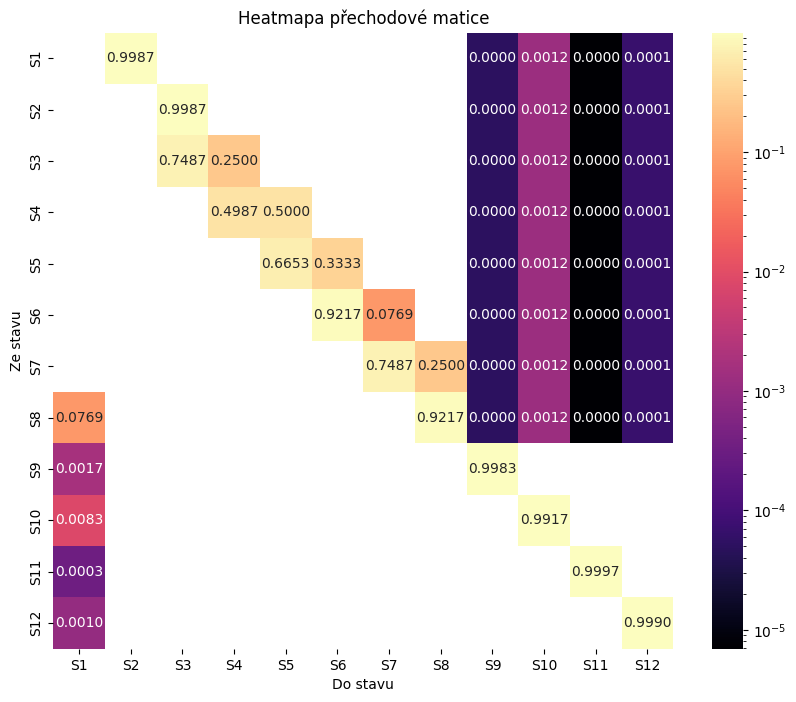

In [13]:
plt.figure(figsize=(10,8))

sns.heatmap(
    df,
    annot=True,
    fmt=".4f",
    cmap="magma",
    norm=plt.matplotlib.colors.LogNorm()
)

plt.title("Heatmapa přechodové matice")
plt.xlabel("Do stavu")
plt.ylabel("Ze stavu")
plt.show()

In [14]:
df.to_csv('../../data/03_StochModel/transition_matrix.csv', index=False)

Zdroj: vlastní implementace na základě [Stewart, 2009]
* Stewart, W.J. (2009). Probability, Markov Chains, Queues, and Simulation. Princeton University Press.
*  Norris, J.R. (1998). Markov Chains. Cambridge University Press.

### Autor / Organizace / Datum

Vjačeslav Usmanov, ČVUT v Praze, Fakulta stavební

###### Přehled změn


|  Datum (YYYY-MM-DD) |  Verze | Autor změny  |  Popis změny |
|---|---|---|---|
| 2026-01-25 | 1.1 | Vjačeslav Usmanov| added SM_01_Transition_matrix.ipynb |
| 2026-02-15 | 1.2 | Vjačeslav Usmanov| changed SM_01_Transition_matrix.ipynb |